## Benchmarking Accuracy 

1.Latif, G., Alghazo, J., Mohammad, N., & Alghazo, R. (2021). *Communicating with the deaf and hard of hearing through Automatic Arabic Sign Language translator.* 
 - **92.15%** accuracy using Random Forest, Bagging classifier, Regression and Random Tree

2.Alawwad, R. A., Bchir, O., & Maher, M. (2021). *Arabic sign language recognition using faster R-CNN.*
- **93.4% & 93.2%** accuracy for ResNet18 and VGG16

3.Latif, G., Mohammad, N., AlKhalaf, R., AlKhalaf, R., Alghazo, J., & Khan, M. (2020). *An automatic arabic sign language recognition system based on 	Deep CNN: An assistive system for the deaf and hard of hearing.*
- **97.6%** accuracy for Deep CNN with 13 layers

In [1]:
import numpy as np
import pandas as pd
import os
import PIL
import PIL.Image
import matplotlib.pyplot as plt
import seaborn as sns


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.applications.imagenet_utils import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras import backend as K
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D

import time
import platform 

In [2]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [3]:
print(platform.machine())
print(platform.version())
print(platform.processor())

arm64
Darwin Kernel Version 22.4.0: Mon Mar  6 21:01:02 PST 2023; root:xnu-8796.101.5~3/RELEASE_ARM64_T8112
arm


In [4]:
dataset_path = "/Users/kimhoonglim/Desktop/WQD7002/ArASL_Database_54K_Final"
label_path = "/Users/kimhoonglim/Desktop/WQD7002/ArSL_Data_Labels.csv"

df = pd.read_csv(label_path)

classes = df.Class.unique().tolist()

In [5]:
df.head()

,#,File_Name,Class
0,1,AIN (1).JPG,ain
1,2,AIN (10).JPG,ain
2,3,AIN (100).jpg,ain
3,4,AIN (1000).JPG,ain
4,5,AIN (1001).JPG,ain


In [6]:
classes

['ain',
 'al',
 'aleff',
 'bb',
 'dal',
 'dha',
 'dhad',
 'fa',
 'gaaf',
 'ghain',
 'ha',
 'haa',
 'jeem',
 'kaaf',
 'khaa',
 'la',
 'laam',
 'meem',
 'nun',
 'ra',
 'saad',
 'seen',
 'sheen',
 'ta',
 'taa',
 'thaa',
 'thal',
 'toot',
 'waw',
 'ya',
 'yaa',
 'zay']

In [7]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2)

valid_datagen = ImageDataGenerator(rescale = 1./255,
                                  validation_split = 0.2)

In [8]:
train_dataset = train_datagen.flow_from_directory(directory = dataset_path,
                                                   target_size = (224,224),
                                                   class_mode = 'categorical',
                                                   subset = 'training',
                                                   batch_size = 64)

valid_dataset = valid_datagen.flow_from_directory(directory = dataset_path,
                                                  target_size = (224,224),
                                                  class_mode = 'categorical',
                                                  subset = 'validation',
                                                  batch_size = 64)

Found 43252 images belonging to 32 classes.
Found 10797 images belonging to 32 classes.


In [9]:
batch_size = 64
img_height = 64
img_width = 64

train_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
    color_mode='grayscale')
    
val_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
    color_mode='grayscale')

Found 54049 files belonging to 32 classes.
Using 43240 files for training.
Metal device set to: Apple M2


2023-06-11 19:37:19.772971: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-06-11 19:37:19.773410: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Found 54049 files belonging to 32 classes.
Using 10809 files for validation.


In [10]:
class_names_train = train_ds.class_names
print(class_names_train)
class_names_val = val_ds.class_names
print(class_names_val)
print(class_names_train == class_names_val)

['ain', 'al', 'aleff', 'bb', 'dal', 'dha', 'dhad', 'fa', 'gaaf', 'ghain', 'ha', 'haa', 'jeem', 'kaaf', 'khaa', 'la', 'laam', 'meem', 'nun', 'ra', 'saad', 'seen', 'sheen', 'ta', 'taa', 'thaa', 'thal', 'toot', 'waw', 'ya', 'yaa', 'zay']
['ain', 'al', 'aleff', 'bb', 'dal', 'dha', 'dhad', 'fa', 'gaaf', 'ghain', 'ha', 'haa', 'jeem', 'kaaf', 'khaa', 'la', 'laam', 'meem', 'nun', 'ra', 'saad', 'seen', 'sheen', 'ta', 'taa', 'thaa', 'thal', 'toot', 'waw', 'ya', 'yaa', 'zay']
True


2023-06-11 19:37:20.675503: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


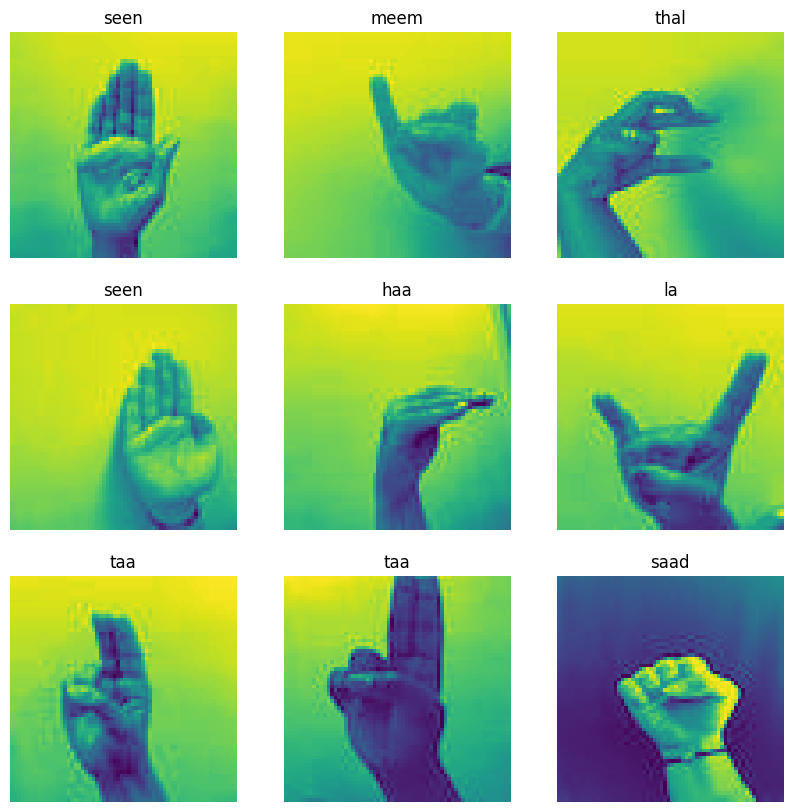

In [11]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names_train[labels[i]])
    plt.axis("off")

In [12]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break
# 3 color channels RGB

(64, 64, 64, 1)
(64,)


In [13]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.29411766 0.96470594


In [14]:
# Dataset performance configuration, keep images in memory after first ieration to avoid bottleneck
# overlaps data preprocessing and model execution while training
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [15]:
def recall(y_true, y_pred):
    y_true = K.ones_like(y_true)
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    all_positives = K.sum(K.round(K.clip(y_true, 0, 1)))

    recall = true_positives / (all_positives + K.epsilon())
    return recall

def precision(y_true, y_pred):
    y_true = K.ones_like(y_true)
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))

    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    precision1 = precision(y_true, y_pred)
    recall1 = recall(y_true, y_pred)
    return 2*((precision1*recall1)/(precision1+recall1+K.epsilon()))

In [16]:
num_classes = len(class_names_train)

model1 = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),  
  tf.keras.layers.Conv2D(32, (3,3), activation='relu',input_shape = (64,64,1)),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2,2)),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2,2)),  
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(num_classes,activation = 'softmax')
])

print('done')

model1.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
  metrics=['accuracy',f1_score, precision, recall])


done


In [17]:
start = time.time()
epochs=50
history = model1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50


2023-06-11 19:37:21.634327: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


676/676 [==============================] - ETA: 0s - loss: 1.4893 - accuracy: 0.5689 - f1_score: 0.5895 - precision: 0.8550 - recall: 0.4994

2023-06-11 19:37:37.499899: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


676/676 [==============================] - 18s 26ms/step - loss: 1.4893 - accuracy: 0.5689 - f1_score: 0.5895 - precision: 0.8550 - recall: 0.4994 - val_loss: 0.5103 - val_accuracy: 0.8585 - val_f1_score: 0.9363 - val_precision: 1.0000 - val_recall: 0.8811
Epoch 2/50
676/676 [==============================] - 18s 27ms/step - loss: 0.3437 - accuracy: 0.9064 - f1_score: 0.9632 - precision: 1.0000 - recall: 0.9299 - val_loss: 0.2616 - val_accuracy: 0.9404 - val_f1_score: 0.9786 - val_precision: 1.0000 - val_recall: 0.9584
Epoch 3/50
676/676 [==============================] - 18s 26ms/step - loss: 0.2080 - accuracy: 0.9461 - f1_score: 0.9834 - precision: 1.0000 - recall: 0.9676 - val_loss: 0.2092 - val_accuracy: 0.9511 - val_f1_score: 0.9875 - val_precision: 1.0000 - val_recall: 0.9755
Epoch 4/50
676/676 [==============================] - 18s 26ms/step - loss: 0.1459 - accuracy: 0.9619 - f1_score: 0.9893 - precision: 1.0000 - recall: 0.9791 - val_loss: 0.2029 - val_accuracy: 0.9532 - val_f

676/676 [==============================] - 19s 27ms/step - loss: 0.0150 - accuracy: 0.9952 - f1_score: 0.9997 - precision: 1.0000 - recall: 0.9995 - val_loss: 0.2891 - val_accuracy: 0.9624 - val_f1_score: 0.9990 - val_precision: 1.0000 - val_recall: 0.9981
Epoch 32/50
676/676 [==============================] - 19s 28ms/step - loss: 0.0174 - accuracy: 0.9946 - f1_score: 0.9998 - precision: 1.0000 - recall: 0.9996 - val_loss: 0.2622 - val_accuracy: 0.9698 - val_f1_score: 0.9986 - val_precision: 1.0000 - val_recall: 0.9972
Epoch 33/50
676/676 [==============================] - 18s 27ms/step - loss: 0.0110 - accuracy: 0.9963 - f1_score: 0.9999 - precision: 1.0000 - recall: 0.9998 - val_loss: 0.2585 - val_accuracy: 0.9688 - val_f1_score: 0.9988 - val_precision: 1.0000 - val_recall: 0.9977
Epoch 34/50
676/676 [==============================] - 18s 27ms/step - loss: 0.0224 - accuracy: 0.9934 - f1_score: 0.9998 - precision: 1.0000 - recall: 0.9996 - val_loss: 0.2774 - val_accuracy: 0.9661 - va

In [18]:
end = time.time()

In [19]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 64, 64, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        3

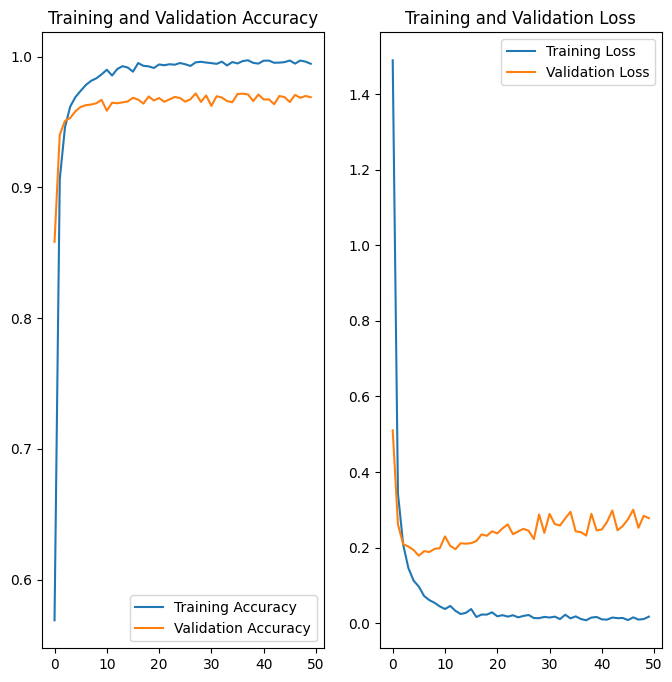

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

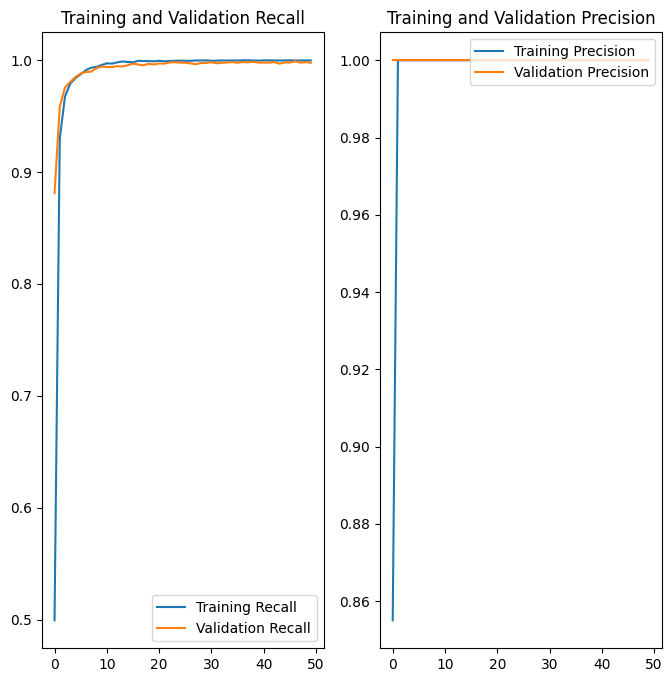

In [21]:
recall = history.history['recall']
val_recall = history.history['val_recall']

precision = history.history['precision']
val_precision = history.history['val_precision']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, recall, label='Training Recall')
plt.plot(epochs_range, val_recall, label='Validation Recall')
plt.legend(loc='lower right')
plt.title('Training and Validation Recall')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, precision, label='Training Precision')
plt.plot(epochs_range, val_precision, label='Validation Precision')
plt.legend(loc='upper right')
plt.title('Training and Validation Precision')
plt.show()

In [22]:
print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")

The time of execution of above program is : 903988.3487224579 ms


In [23]:
max(history.history['val_accuracy'])*100

97.19678163528442

In [24]:
max(history.history['val_f1_score'])*100

99.94875192642212

In [25]:
max(history.history['val_precision'])*100

100.0

In [26]:
max(history.history['val_recall'])*100

99.89829659461975

In [27]:
batch_size

64

In [28]:
epochs

50

## Record of Changes in Batch Size - 5 Epoch

| Batch | Accuracy | F1 Score | Precision | Recall | Time Taken |
| --- | --- | --- | --- | --- | --- |
| 64 | 95.53 | 98.95 | 100 | 97.94 | 141,872.29 ms |
| 128 | 94.69 | 98.86 | 100 | 97.75 | 215,303.97 ms |
| 1028 | 79.87 | 87.67 | 100 | 78.06 | 100,771.27 ms |

## Record of Changes in Batch Size - 10 Epoch

| Batch | Accuracy | F1 Score | Precision | Recall | Time Taken |
| --- | --- | --- | --- | --- | --- |
| 64 | 96.53 | 99.68 | 100 | 99.36 | 265,174.66 ms |
| 128 | 95.39 | 99.43 | 100 | 98.88 | 254,419.67 ms |
| 1028 | 90.81 | 96.35 | 100 | 92.95 | 226,188.30 ms |

## Record of Changes in Batch Size - 20 Epoch


| Batch | Accuracy | F1 Score | Precision | Recall | Time Taken |
| --- | --- | --- | --- | --- | --- |
| 64 |  |
| 128 |  |
| 1028 |  |

## Record of Changes in Batch Size - 50 Epoch


| Batch | Accuracy | F1 Score | Precision | Recall | Time Taken |
| --- | --- | --- | --- | --- | --- |
| 64 |  |
| 128 |  |
| 1028 |  |

## Record of Changes in Epoch

| Epoch | Accuracy | F1 Score | Precision | Recall | Time Taken |
| --- | --- | --- | --- | --- | --- |
| 50 | 97.12 | 99.93 | 100 | 99.87 | 2,017,672.96 ms |
| 20 | 96.71 | 99.85 | 100 | 99.71 | 712,593.04 ms |
| 10 | 96.52 | 99.64 | 100 | 99.29 | 357,231.49 ms |
| 5 | 95.98 | 99.43 | 100 | 98.89 | 179,678.81 ms |